In [99]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
rtest = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')

In [100]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=123)
X = X.toarray()

X_test, y_test = load_svmlight_file(f=BytesIO(rtest.content), n_features=123)
X_test = X_test.toarray()

In [101]:
import numpy as np

# preprocess
n_samples, n_features = X.shape
X_train = np.column_stack((X, np.ones((n_samples, 1))))

X_test = np.column_stack((X_test, np.ones((X_test.shape[0], 1))))

y_train = y.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [139]:
# set hyper-parameters
learning_rate = 0.005
max_epoch = 100
batch_size = 256
# soft margin trade off
C = 0.5

losses_train = []
losses_val = []
val_acc = []

In [154]:
acc_zeros = []
acc_random = []
acc_normal = []

In [160]:
# select different initializing method
#w = np.zeros((n_features + 1, 1))  # initialize with zeros
#w = np.random.random((n_features + 1, 1))  # initialize with random numbers
w = np.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [156]:
def predict(data):
    return np.dot(data, w)

def getLoss(predict, label):
    loss = np.sum(np.sqrt(w**2))/2
    loss1 = np.maximum(0,1-label*predict)
    loss1 = np.sum(loss1)
    loss = loss + C * loss1
    return loss

In [161]:
for epoch in range(max_epoch):
    
    # select a batch from training set
    choice_index = np.random.choice(n_samples, batch_size)
    selected_y = y_train[choice_index]
    selected_X = X_train[choice_index]
    selected_predict = predict(selected_X)
    
    # update parameters
    sub_g = np.where(1-selected_y*selected_predict>=0, -selected_y*selected_X, 0)
    G = np.sum(sub_g, axis=0)*C # calculate the gradient
    G = G.reshape(-1,1)
    w_copy = np.copy(w)
    w_copy[-1] = 0
    G += w_copy
    G = -G
    w += learning_rate * G  # update the parameters
    
    # predict and get train loss
    loss_train = getLoss(selected_predict, selected_y)
    losses_train.append(loss_train)
    
    # predict and get test loss
    test_pre = predict(X_test)
    loss_val = getLoss(test_pre, y_test)
    losses_val.append(loss_val)
    
    # get test accuracy
    test_pre = np.where(test_pre>=0, 1, -1)
    acc = np.mean(test_pre==y_test)
    val_acc.append(acc)
    
    #acc_zeros.append(acc)
    #acc_random.append(acc)
    acc_normal.append(acc)
    


In [144]:
print(val_acc[-5:])

[0.8462010932989374, 0.8462010932989374, 0.8447269823720902, 0.8414102327866838, 0.8374792703150912]


(array([2500., 3000., 3500., 4000., 4500., 5000., 5500., 6000.]),
 <a list of 8 Text yticklabel objects>)

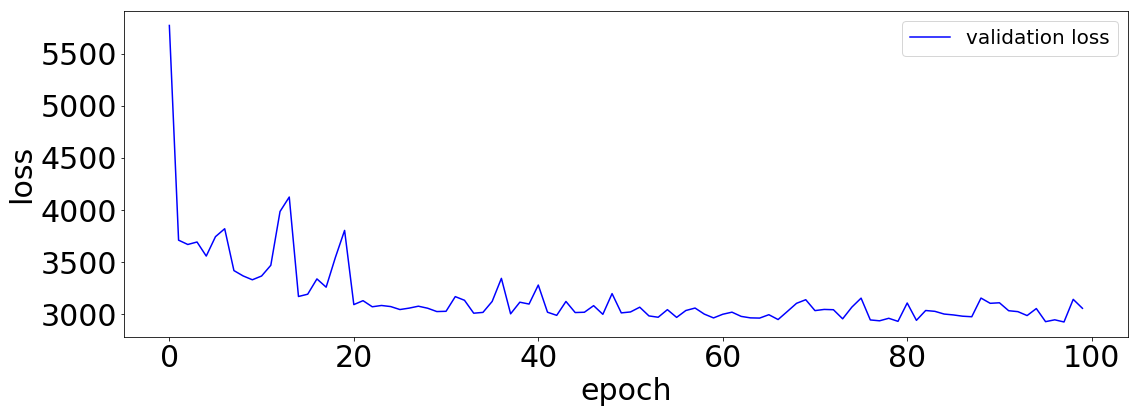

In [145]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch",fontsize=30)
plt.ylabel("loss",fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([ 20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 7 Text yticklabel objects>)

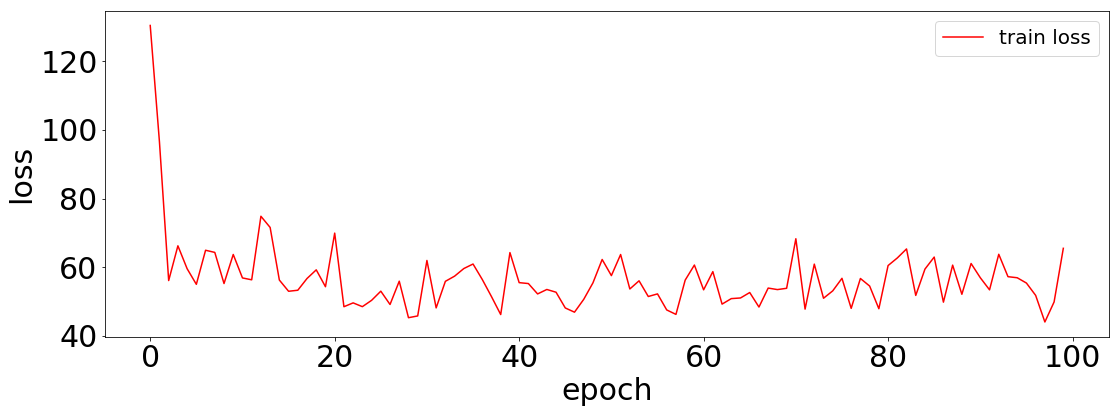

In [146]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.xlabel("epoch",fontsize=30)
plt.ylabel("loss",fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86]),
 <a list of 7 Text yticklabel objects>)

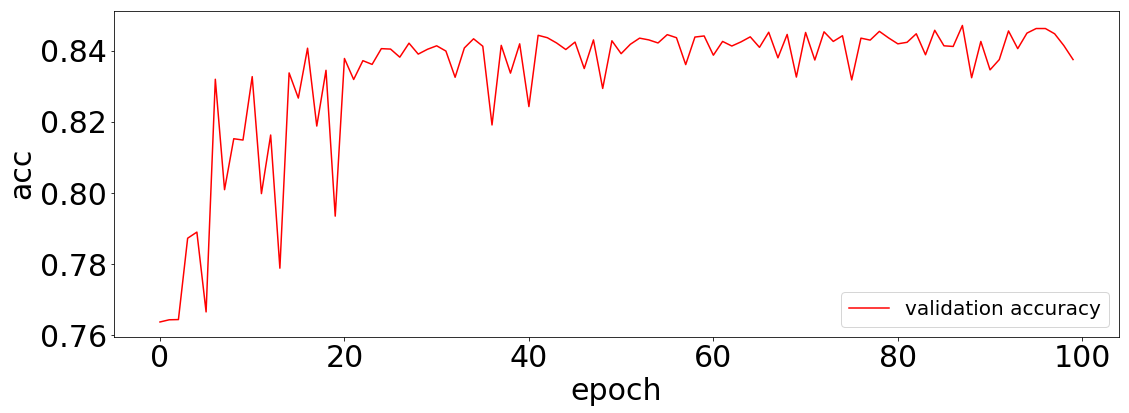

In [147]:
%matplotlib inline

plt.figure(figsize=(18, 6))
plt.plot(val_acc, "-", color="r", label="validation accuracy")
plt.xlabel("epoch",fontsize=30)
plt.ylabel("acc",fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 8 Text yticklabel objects>)

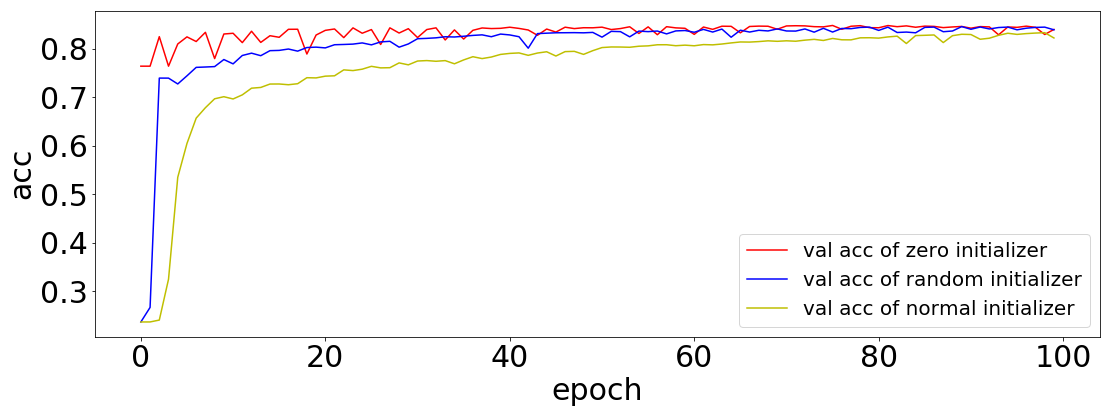

In [162]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(acc_zeros, "-", color="r", label="val acc of zero initializer")
plt.plot(acc_random, "-", color="b", label="val acc of random initializer")
plt.plot(acc_normal, "-", color="y", label="val acc of normal initializer")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("acc", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [163]:
print(np.mean(acc_zeros[-10:]))
print(np.mean(acc_random[-10:]))
print(np.mean(acc_normal[-10:]))

0.840820588415945
0.8420551563171795
0.8276150113629385


In [150]:
print(np.mean(losses_train[-10:]))
print(np.mean(losses_val[-10:]))
print(np.mean(val_acc[-10:]))

55.48667921658389
3021.66030005134
0.8419077452244949
